In [10]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude
import numpy as np
from matplotlib import font_manager as fm, rcParams

In [11]:
df=pd.read_csv("./FinalTaylorSwiftLyrics.csv")
df.head()

,album,track_title,lyric,year
0,Taylor Swift,Tim McGraw,He said the way my blue eyes shined,2006
1,Taylor Swift,Tim McGraw,Put those Georgia stars to shame that night,2006
2,Taylor Swift,Tim McGraw,"I said, ""That's a lie""",2006
3,Taylor Swift,Tim McGraw,Just a boy in a Chevy truck,2006
4,Taylor Swift,Tim McGraw,That had a tendency of gettin' stuck,2006


with open("./lipsum.txt") as f:
    text = f.readlines()
words=[]
for i in text:
    words.append(i.split("\n")[0])

wordstr=' '.join(words)

In [12]:
text=list((df[df['album'] == 'reputation'])['lyric'])
words=[]
for index,i in enumerate(text):
    if isinstance(i,float):
        text[index]=" "

wordstr=" ".join(text)

## Wordcloud without edge sep

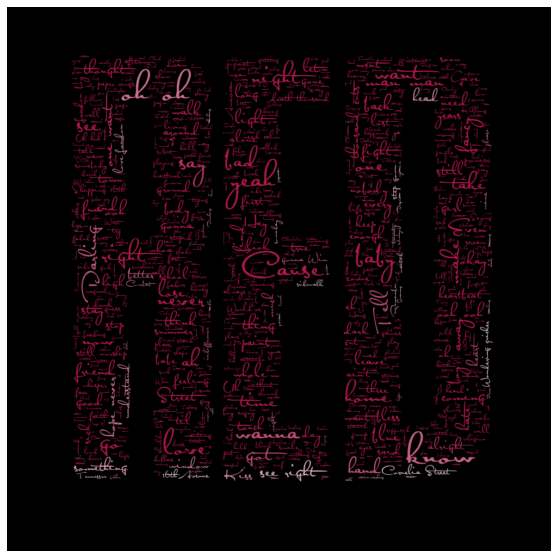

In [4]:
def filepathwc(fpath,remark=''):
    #dtstr=datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")
    dtstr=datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S ")
    fname=fpath+"wordcloud "+dtstr+remark+".png"
    return fname

fontpath="./Fonts/Satisfaction.ttf"
#fontpath="./Fonts/Taylor Swift Handwriting.ttf"
#prop = fm.FontProperties(fname=fontpath)

image_path="./Images/Red.png"

tay_mask = np.array(Image.open(image_path))
#ish_mask=np.array(Image.open("/content/drive/My Drive/Colab Notebooks/TWC Res/ImgCol/ishmask5.png"))
image_colors = ImageColorGenerator(tay_mask)
#imagecolor_color = np.array(Image.open(os.path.join(d, "parrot-by-jose-mari-gimenez2.jpg")))

stopwords = set(STOPWORDS)

#edges = np.mean([gaussian_gradient_magnitude(image_colors[:, :, i] / 255., 2) for i in range(3)], axis=0)
#tay_mask[edges > .08] = 255

wc = WordCloud(background_color="black", mask=tay_mask,
               font_path=fontpath,
               random_state=40,max_words=1000,contour_width=0, max_font_size=60, width=1000, height=1000)
# generate word cloud

wc.generate(wordstr)


plt.figure(figsize=[10,10])
#plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

remark1=""

fname=filepathwc("./WordClouds/",remark1)
wc.to_file(fname)
plt.show()

## Wordcloud with edgesep

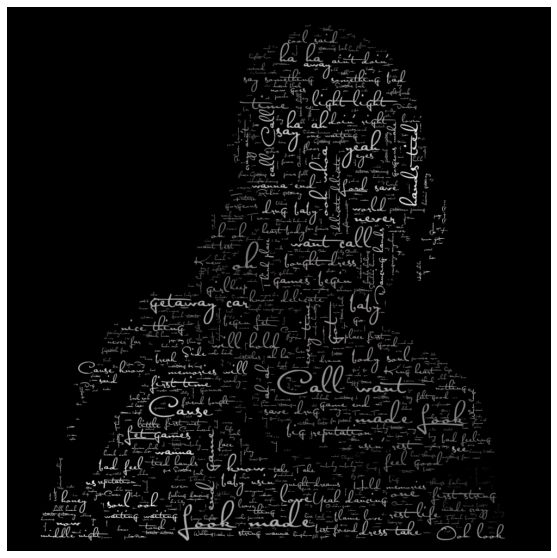

In [13]:
def filepathwc(fpath,remark=''):
    #dtstr=datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")
    dtstr=datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S ")
    fname=fpath+"wordcloud "+dtstr+remark+".png"
    return fname


fontpath="./Fonts/Satisfaction.ttf"
#fontpath="./Fonts/Taylor Swift Handwriting.ttf"
#prop = fm.FontProperties(fname=fontpath)

image_path="./Images/Reputation.png"

tay_color = np.array(Image.open(image_path))
#image_colors = ImageColorGenerator(tay_mask)

#tay_color = tay_color[::3, ::3]

tay_mask = tay_color.copy()
tay_mask[tay_mask.sum(axis=2) == 0] = 255

edges = np.mean([gaussian_gradient_magnitude(tay_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
tay_mask[edges > .08] = 255
#0.08

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="black", mask=tay_mask,
               font_path=fontpath,
               random_state=40,max_words=3000,contour_width=0, max_font_size=50, width=1000, height=1000)
# generate word cloud

wc.generate(wordstr)

image_colors = ImageColorGenerator(tay_color)
plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

remark1=""

fname=filepathwc("./WordClouds/",remark1)
wc.to_file(fname)
plt.show()